In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = yf.download('BTC-USD','2015-01-01','2023-11-30')

[*********************100%%**********************]  1 of 1 completed


In [3]:
data = pd.DataFrame(data)

In [5]:
data.reset_index(inplace=True)

In [7]:
data.drop(columns = ['Date','Open','High','Low','Adj Close','Volume'], inplace=True)

In [8]:
data

,Close
0,314.248993
1,315.032013
2,281.082001
3,264.195007
4,274.473999
...,...
3250,37796.792969
3251,37479.121094
3252,37254.167969
3253,37831.085938


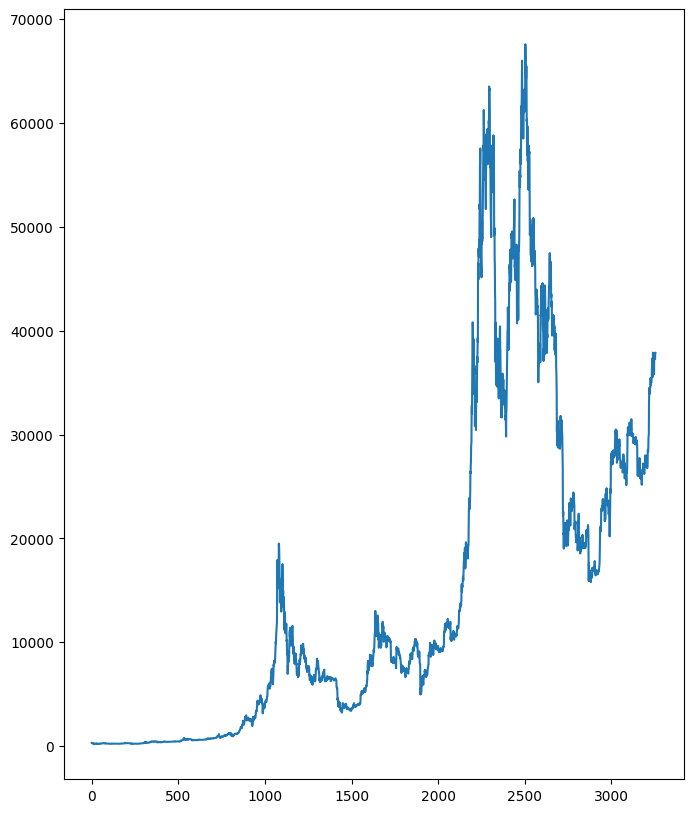

In [9]:
plt.figure(figsize=(8,10))
plt.plot(data)
plt.show()

In [11]:
train_data = data[:-100]
test_data = data[-100:]

In [12]:
train_data.shape

(3155, 1)

In [13]:
test_data.shape

(100, 1)

In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [15]:
train_data_scale = scaler.fit_transform(train_data)

In [16]:
base_days = 100

In [17]:
x = []
y = []
for i in range(base_days, train_data_scale.shape[0]):
    x.append(train_data_scale[i-base_days:i])
    y.append(train_data_scale[i,0])

In [21]:
x, y = np.array(x), np.array(y)

In [22]:
x = np.reshape(x, (x.shape[0],x.shape[1],1))

In [23]:
from keras.layers import LSTM, Dense, Dropout
from keras.models import Sequential

In [24]:
model = Sequential()
model.add(LSTM(50, activation = 'relu', return_sequences=True, input_shape=(x.shape[1],1)))
model.add(Dropout(0.2))
model.add(LSTM(60, activation='relu',return_sequences=True))
model.add(Dropout(0.3))
model.add(LSTM(80, activation='relu',return_sequences=True))
model.add(Dropout(0.4))
model.add(LSTM(120, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [26]:
model.compile(optimizer='adam', loss = 'mean_squared_error')

In [27]:
model.fit(x, y, epochs = 50, verbose =1 )

Epoch 1/50
96/96 [==============================] - 19s 146ms/step - loss: 0.0158
Epoch 2/50
96/96 [==============================] - 14s 148ms/step - loss: 0.0051
Epoch 3/50
96/96 [==============================] - 14s 148ms/step - loss: 0.0057
Epoch 4/50
96/96 [==============================] - 14s 148ms/step - loss: 0.0043
Epoch 5/50
96/96 [==============================] - 14s 151ms/step - loss: 0.0037
Epoch 6/50
96/96 [==============================] - 15s 152ms/step - loss: 0.0032
Epoch 7/50
96/96 [==============================] - 15s 153ms/step - loss: 0.0035
Epoch 8/50
96/96 [==============================] - 15s 152ms/step - loss: 0.0034
Epoch 9/50
96/96 [==============================] - 15s 153ms/step - loss: 0.0034
Epoch 10/50
96/96 [==============================] - 15s 156ms/step - loss: 0.0031
Epoch 11/50
96/96 [==============================] - 16s 168ms/step - loss: 0.0028
Epoch 12/50
96/96 [==============================] - 16s 165ms/step - loss: 0.0032
Epoch 13/50
9

In [102]:
test_data = pd.concat((train_data.tail(100), test_data), ignore_index=True)

In [103]:
test_data

,Close
0,26930.638672
1,27192.693359
2,27036.650391
3,27398.802734
4,26832.208984
...,...
195,37796.792969
196,37479.121094
197,37254.167969
198,37831.085938


In [138]:
test_data_scale = scaler.transform(test_data)

In [165]:
x = []
y = [] 

for i in range(base_days, test_data_scale.shape[0]):
    x.append(test_data_scale[i-base_days:i])
    y.append(test_data_scale[i,0])

In [166]:
x, y = np.array(x), np.array(y)

In [167]:
x = np.reshape(x, (x.shape[0],x.shape[1],1))

In [168]:
pred = model.predict(x)

4/4 [==============================] - 0s 33ms/step


In [169]:
pred = scaler.inverse_transform(pred)

In [170]:
pred

array([[25256.123],
       [24867.148],
       [24649.938],
       [24588.979],
       [24632.074],
       [24724.406],
       [24829.223],
       [24924.088],
       [25099.29 ],
       [25351.576],
       [25543.438],
       [25588.45 ],
       [25496.24 ],
       [25323.594],
       [25119.295],
       [24922.541],
       [24758.854],
       [24668.78 ],
       [24644.338],
       [24662.848],
       [24697.37 ],
       [24688.639],
       [24659.355],
       [24657.107],
       [24722.666],
       [24859.01 ],
       [25034.318],
       [25206.645],
       [25358.656],
       [25508.393],
       [25652.049],
       [25739.729],
       [25750.15 ],
       [25693.96 ],
       [25578.299],
       [25430.984],
       [25277.73 ],
       [25149.367],
       [25104.195],
       [25152.328],
       [25271.469],
       [25490.986],
       [25759.785],
       [26009.21 ],
       [26218.21 ],
       [26351.443],
       [26434.54 ],
       [26490.887],
       [26529.904],
       [26531.717],


In [171]:
#future Bitcoin Price

In [190]:
m = y
z= []
future_days = 30
for i in range(base_days, len(m)+future_days):
    m = m.reshape(-1,1)
    inter = [m[-base_days:,0]]
    inter = np.array(inter)
    inter = np.reshape(inter, (inter.shape[0], inter.shape[1],1))
    pred = model.predict(inter)
    m = np.append(m ,pred)
    z = np.append(z, pred)


1/1 [==============================] - 0s 32ms/step


In [191]:
z = np.array(z)
z = scaler.inverse_transform(z.reshape(-1,1))

In [192]:
z

array([[35439.61784558],
       [35226.23969959],
       [34736.71874994],
       [34056.94770362],
       [33282.0275089 ],
       [32485.15012736],
       [31708.69957716],
       [30971.65869282],
       [30278.89167506],
       [29632.92702458],
       [29032.28258608],
       [28474.29931673],
       [27955.98278082],
       [27474.29837585],
       [27026.5589422 ],
       [26610.07732027],
       [26221.6923821 ],
       [25858.28919156],
       [25516.95766323],
       [25195.2817635 ],
       [24891.28327694],
       [24603.82548284],
       [24330.93819915],
       [24070.37007616],
       [23820.46824962],
       [23579.82888953],
       [23347.36749199],
       [23121.25245048],
       [22899.7445421 ],
       [22682.06653907]])

In [193]:
model.save('Bitcoin_Price_prediction_Model.keras')